In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [28]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Explore data

In [29]:
df.shape

(200, 5)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Transform object data

In [32]:
label = LabelEncoder()

In [33]:
df.Gender=label.fit_transform(df.Gender)

Creat model

In [34]:
scaler = StandardScaler()

In [35]:
x_df = scaler.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [36]:
Clusters = []
Inertia = []

In [37]:
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(df)
    Inertia.append(model.inertia_)
    Clusters.append(i)
     

In [38]:
result = pd.DataFrame({
    'Clusters' : Clusters,
    'Insertia' : Inertia
})
result.set_index('Clusters')

,Insertia
Clusters,
1,975512.060000
2,387065.713771
3,271765.809743
4,228157.033242
5,174691.024306
6,122670.552668
7,111561.915081
8,94178.689720
9,81616.300971


Text(0, 0.5, 'Error')

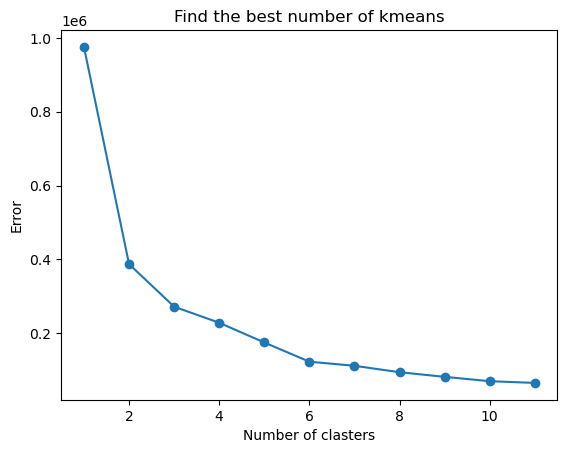

In [39]:
plt.plot(Clusters,Inertia,marker='o')
plt.title('Find the best number of kmeans')
plt.xlabel('Number of clasters')
plt.ylabel('Error')

In [40]:

k=4
model = KMeans(n_clusters=k)
model.fit(df)
pred=model.predict(df)


In [41]:
# Addition column that includes predictions to df
df['k-means'] = pred

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k-means
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [43]:
df['k-means'].unique()

array([0, 3, 2, 1])

In [44]:

df1= df[df['k-means']==0]
df2= df[df['k-means']==1]
df3= df[df['k-means']==2]
df4= df[df['k-means']==3]


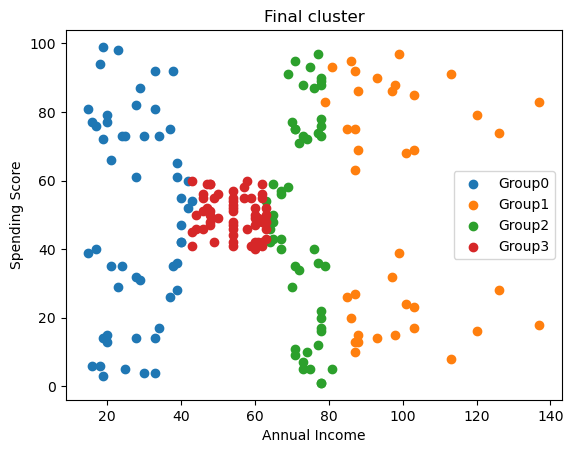

In [53]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group0')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group1')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group2')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group3')

plt.title('Final cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


<Axes: xlabel='k-means', ylabel='count'>

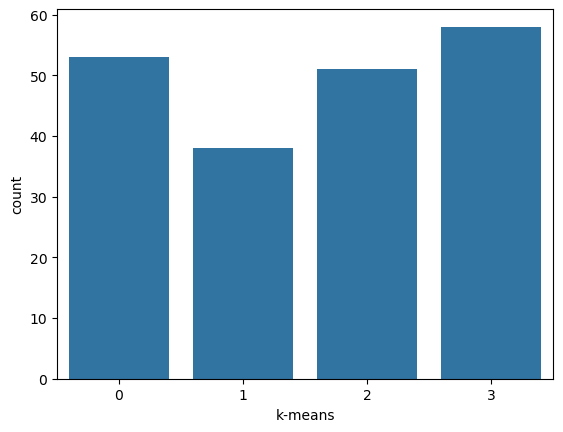

In [46]:

sns.countplot(x='k-means', data=df)

In [47]:
df['k-means'].value_counts()

k-means
3    58
0    53
2    51
1    38
Name: count, dtype: int64

<Axes: ylabel='count'>

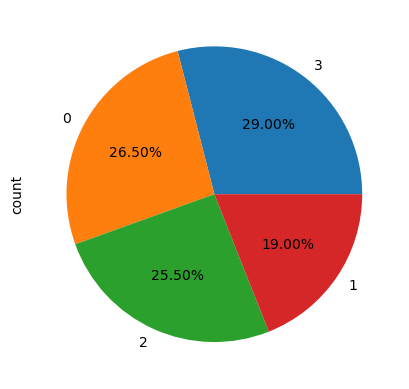

In [48]:
df['k-means'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k-means', ylabel='Spending Score (1-100)'>

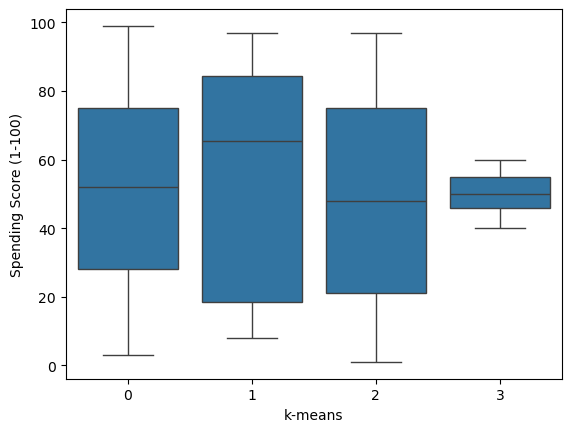

In [49]:
sns.boxplot(data=df,x='k-means',y='Spending Score (1-100)')

<Axes: xlabel='Age', ylabel='Count'>

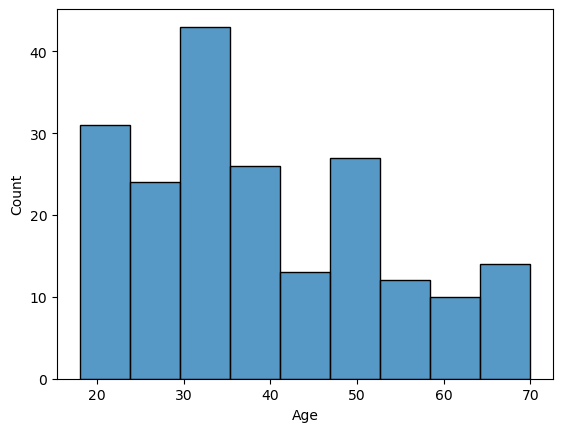

In [50]:
sns.histplot(df.Age)

<Axes: xlabel='k-means', ylabel='count'>

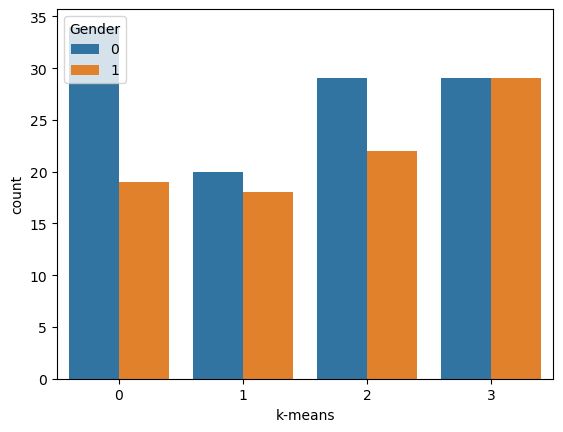

In [51]:
sns.countplot(x='k-means',hue=df.Gender, data=df)

<Axes: xlabel='Gender', ylabel='count'>

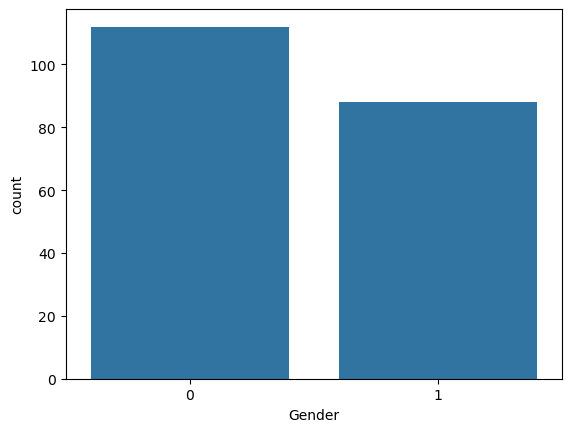

In [52]:

sns.countplot(data=df, x='Gender')